# Sampling from a Biased Population

In this tutorial we will go over some code that recreates the visualizations in the Interactive Sampling Distribution Demo. This demo looks at a hypothetical problem that illustrates what happens when we sample from a biased population and not the entire population we are interested in. This tutorial assumes that you have seen that demo, for context, and understand the statistics behind the graphs.

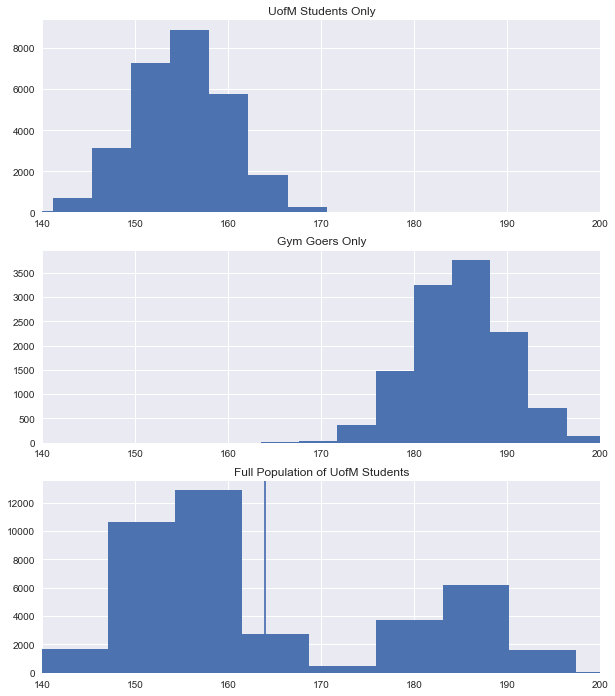

In [9]:
import numpy as np # for sampling for the distributions
import matplotlib.pyplot as plt # for basic plotting 
import seaborn as sns; sns.set() # for plotting of the histograms

# Recreate the simulations from the video 
mean_uofm = 155
sd_uofm = 5
mean_gym = 185 
sd_gym = 5
gymperc = .3
totalPopSize = 40000

# Create the two subgroups
uofm_students = np.random.normal(mean_uofm, sd_uofm, int(totalPopSize * (1 - gymperc)))
students_at_gym = np.random.normal(mean_gym, sd_gym, int(totalPopSize * (gymperc)))

# Create the population from the subgroups
population = np.append(uofm_students, students_at_gym)

# Set up the figure for plotting
plt.figure(figsize=(10,12))

# print(type(uofm_students))
# Plot the UofM students only
plt.subplot(3,1,1)
# sns.distplot(uofm_students)
plt.hist(uofm_students)
plt.title("UofM Students Only")
plt.xlim([140,200])

# # Plot the Gym Goers only
plt.subplot(3,1,2)
plt.hist(students_at_gym)
plt.title("Gym Goers Only")
plt.xlim([140,200])

# Plot both groups together
plt.subplot(3,1,3)
plt.hist(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

plt.show()

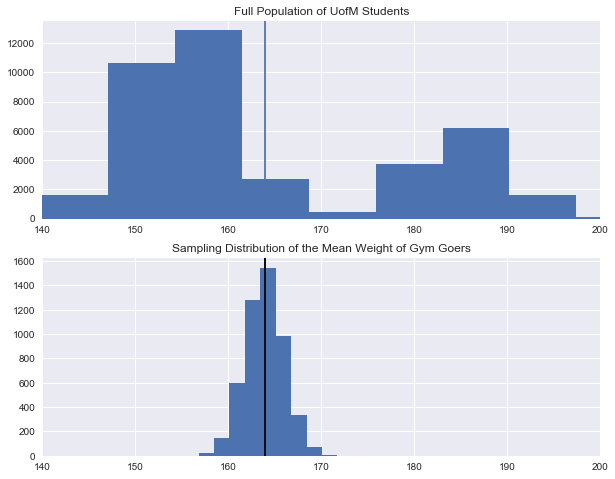

In [11]:
# Simulation parameters
numberSamps = 5000
sampSize = 50

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(population, sampSize)
    mean_distribution[i] = np.mean(random_students)
    
# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
plt.hist(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
plt.hist(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(mean_distribution), color = "black")
plt.xlim([140,200])

plt.show()

In [14]:
rand = np.random.normal(120, 5, 10000)

## What Happens if We take a Non-Representative Sample?
What happens if I only go to the gym to get the weight of individuals, and I don't sample randomly from all students at the University of Michigan?

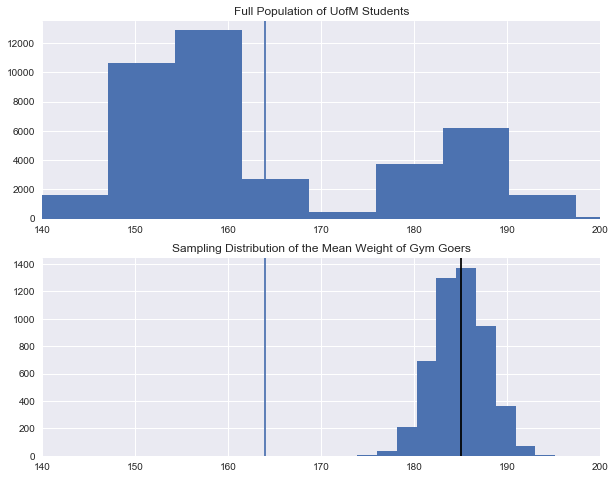

In [21]:
# Simulation parameters
numberSamps = 5000
sampSize = 3

# Get the sampling distribution of the mean from only the gym
mean_distribution = np.empty(numberSamps)
for i in range(numberSamps):
    random_students = np.random.choice(students_at_gym, sampSize)
    mean_distribution[i] = np.mean(random_students) 
    

# Plot the population and the biased sampling distribution
plt.figure(figsize = (10,8))

# Plotting the population again
plt.subplot(2,1,1)
plt.hist(population)
plt.title("Full Population of UofM Students")
plt.axvline(x = np.mean(population))
plt.xlim([140,200])

# Plotting the sampling distribution
plt.subplot(2,1,2)
plt.hist(mean_distribution)
plt.title("Sampling Distribution of the Mean Weight of Gym Goers")
plt.axvline(x = np.mean(population))
plt.axvline(x = np.mean(students_at_gym), color = "black")
plt.xlim([140,200])

plt.show()

### Random Sampling from a Population

From lecture, we know that **Simple Random Sampling (SRS)** has the following properties:

* Start with known list of *N* population units, and randomly select *n* units from the list
* Every unit has **equal probability of selection = _n/N_**
* All possible samples of size *n* are equaly likely
* Estimates of means, proportions, and totals based on SRS are **UNBIASED** (meaning they are equal to the population values on average)

# The Empirical Rule and Distribution

In week 2, we discussed the empirical rule or the 68 - 95 - 99.7 rule, which describes how many observations fall within a certain distance from our mean.  This distance from the mean is denoted as sigma, or standard deviation (the average distance an observation is from the mean).

The following image may help refresh your memory:

### Three Sigma Rule

Also known as the empirical rule or 68 - 95 - 99.7 rule, is an expression of how many of our observations fall within a certain distance of the mean. Remember that the standard deviation is the average distance an observation in the data set is from the mean. It says, given a **normal distribution**, 68% of your observations will fall between one standard deviation of the mean. 95% will fall within two and 99.7% will fall within three. 

This allows us to know how much data is contained under different intervals of a normal distribution. 

![threesigma](three_sigma.png)

In [29]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738)

In [30]:
random.seed(1738)

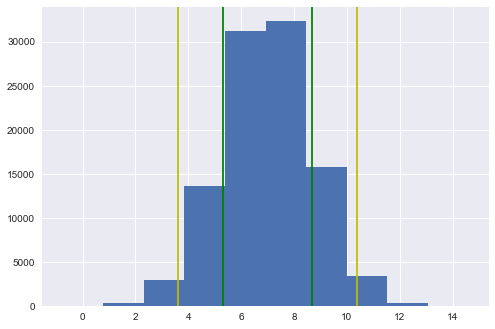

In [31]:
mu = 7

sigma = 1.7

Observations = [random.normalvariate(mu, sigma) for _ in range(100000)]
plt.hist(Observations)

plt.axvline(np.mean(Observations) + np.std(Observations), color = "g")
plt.axvline(np.mean(Observations) - np.std(Observations), color = "g")

plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), color = "y")
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), color = "y")
plt.show()

In [ ]:
pd.Series(Observations).describe()